In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_sales = pd.read_csv('04 Handling Missing Data using Python_Sales.csv')
print(df_sales.head())

       Date  Store_Type  City_Type  Day_Temp  No_of_Customers   Sales  \
0  1-Oct-20           1          1      30.0            100.0  3112.0   
1  2-Oct-20           2          1      32.0            115.0  3682.0   
2  3-Oct-20           3          3      31.0              NaN  2774.0   
3  4-Oct-20           1          2      29.0            105.0  3182.0   
4  5-Oct-20           1          2      33.0            104.0  1368.0   

  Product_Quality  
0               A  
1               A  
2               A  
3             NaN  
4               B  


In [18]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             12 non-null     object 
 1   Store_Type       12 non-null     int64  
 2   City_Type        12 non-null     int64  
 3   Day_Temp         9 non-null      float64
 4   No_of_Customers  9 non-null      float64
 5   Sales            9 non-null      float64
 6   Product_Quality  10 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 800.0+ bytes


In [19]:
df_titanic = pd.read_csv('04 Handling missing value with List & Pairwise Deletion_titanic_train.csv')
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

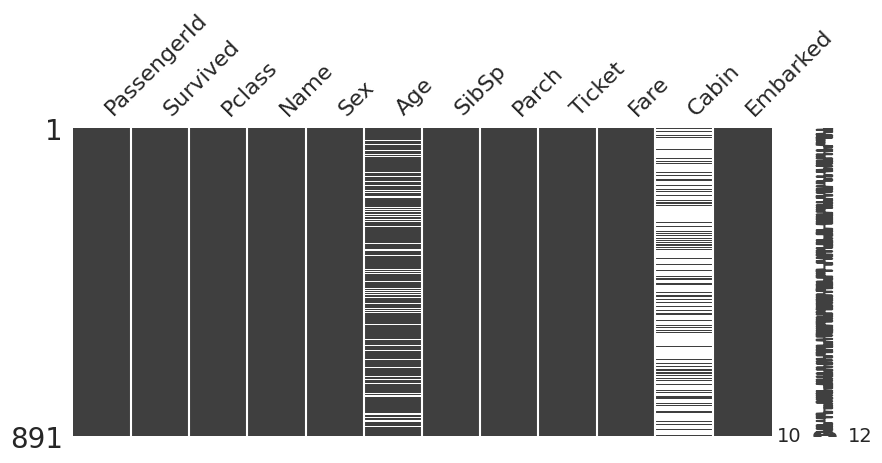

In [20]:
import missingno as msno    

msno.matrix(df_titanic, figsize=(10, 4))
plt.show()

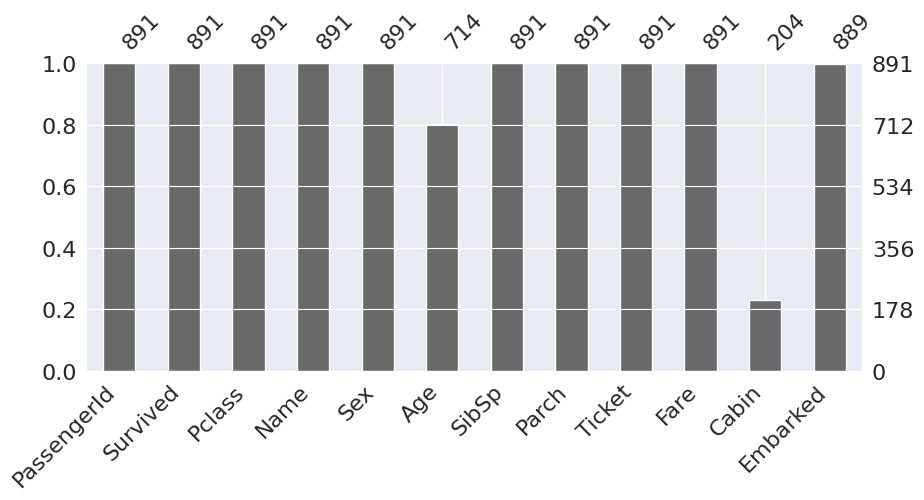

In [21]:
msno.bar(df_titanic, figsize=(10, 4))
plt.show()

<Axes: >

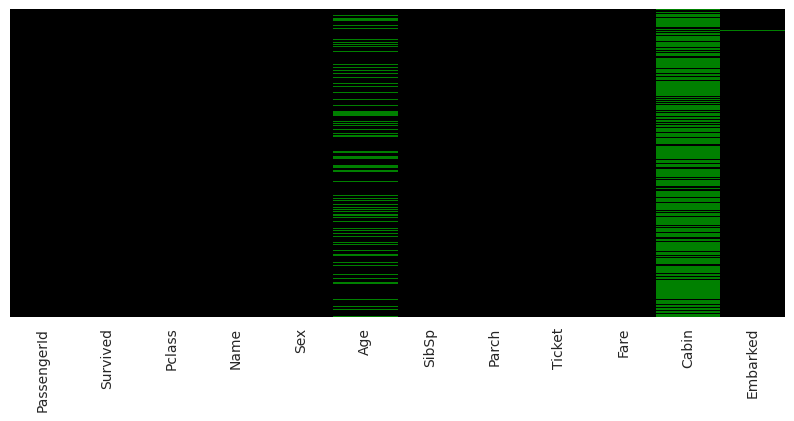

In [22]:
plt.figure(figsize=(10, 4))
sns.heatmap(
    data=df_titanic.isnull(),
    yticklabels=False,
    cmap=sns.color_palette(['black', 'yellow', 'red', 'green']),cbar=False)

In [23]:
percent_missing = df_titanic.isnull().sum() * 100 / len(df_titanic)
missing_value_df = pd.DataFrame({'column_name': df_titanic.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000


In [24]:
# let's delete all the rows where we have NaN values
# df_titanic.dropna(axis=0, inplace=True)
# df_titanic.isnull().sum()


In [25]:
df_titanic_new=df_titanic.dropna()

In [26]:
df_titanic.shape

(891, 12)

In [27]:
df_titanic_new.shape

(183, 12)

## Correlation

In [28]:
import pandas as pd
import numpy as np

# create a sample dataset
data = {
    'Height': [150, 160, 170, 180, 190],
    'Weight': [50, 60, 70, 80, 90],
    'Age': [20, 25, 30, 35, 40]
}
df = pd.DataFrame(data)
print(df)

# calculate correlation matrix
corr = df.corr()
print(corr)

   Height  Weight  Age
0     150      50   20
1     160      60   25
2     170      70   30
3     180      80   35
4     190      90   40
        Height  Weight  Age
Height     1.0     1.0  1.0
Weight     1.0     1.0  1.0
Age        1.0     1.0  1.0


In [32]:
# Identify non-numeric columns
# non_numeric_columns = df_sales.select_dtypes(include=['object']).columns
# print("Non-numeric columns:", non_numeric_columns)
# 
# # Exclude non-numeric columns from the correlation calculation
# df_numeric = df_sales.drop(columns=non_numeric_columns)
# 
# # Calculate the correlation matrix
# correlation_matrix = df_numeric.corr()
# print(correlation_matrix)

correlation_matrix=df_sales.corr(numeric_only=True)
print(correlation_matrix)

Non-numeric columns: Index(['Date', 'Product_Quality'], dtype='object')
                 Store_Type  City_Type  Day_Temp  No_of_Customers     Sales
Store_Type         1.000000   0.478261  0.285247        -0.004855  0.198457
City_Type          0.478261   1.000000  0.240098        -0.287802  0.074625
Day_Temp           0.285247   0.240098  1.000000         0.813452 -0.178471
No_of_Customers   -0.004855  -0.287802  0.813452         1.000000 -0.123071
Sales              0.198457   0.074625 -0.178471        -0.123071  1.000000


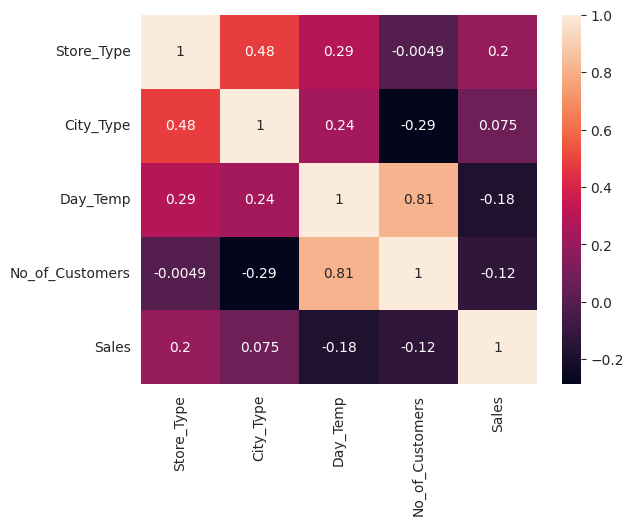

In [33]:
# print above as chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [34]:
import pandas as pd
from sklearn import datasets
import numpy as np

iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [35]:
# let's select for only 2 out of the given 3 spices
iris_df['target'] = iris_df.target.astype('int')
iris_df=iris_df[iris_df['target'].isin([0,1])]
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [36]:
#We now take out 50% of the petal length entries by chance and assign NaN values with a bit of numpy.
random_vec = np.random.random(iris_df["petal length (cm)"].size) < 0.5
iris_df["petal length (cm)"] = iris_df["petal length (cm)"].where(random_vec, other=np.nan)

iris_df.head(10)

/tmp/ipykernel_215278/1246799839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df["petal length (cm)"] = iris_df["petal length (cm)"].where(random_vec, other=np.nan)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,NaN,0.2,0
3,4.6,3.1,NaN,0.2,0
4,5.0,3.6,NaN,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,NaN,0.1,0


In [37]:
print("Petal Length μ = {}".format(iris_df["petal length (cm)"].mean()))
print("Petal Length σ^2 = {}".format(iris_df["petal length (cm)"].std()))

Petal Length μ = 2.6981481481481486
Petal Length σ^2 = 1.4900285853584103


### Imputation - with mean values
#### strategy : it is a method by using which we want to fill in the missing values. the missing value of the strategy could be "mean", "median", "most_frequent", "constant"

In [38]:
# make copy to avoid changing original data (when Imputing)
new_data = iris_df.copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns
                     if new_data[col].isnull().any())
for col in cols_with_missing:
    new_data[col + '_was_missing'] = new_data[col].isnull()

features = new_data.columns

In [39]:
# Imputation
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
new_data.columns = features

new_data.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,petal length (cm)_was_missing
0,5.1,3.5,1.400000,0.2,0.0,0.0
1,4.9,3.0,1.400000,0.2,0.0,0.0
2,4.7,3.2,2.698148,0.2,0.0,1.0
3,4.6,3.1,2.698148,0.2,0.0,1.0
4,5.0,3.6,2.698148,0.2,0.0,1.0
5,5.4,3.9,1.700000,0.4,0.0,0.0
6,4.6,3.4,1.400000,0.3,0.0,0.0
7,5.0,3.4,1.500000,0.2,0.0,0.0
8,4.4,2.9,1.400000,0.2,0.0,0.0
9,4.9,3.1,2.698148,0.1,0.0,1.0


In [48]:
import numpy as np
import pandas as pd

# Create a list of 100 random integers between 0 and 100
lst = [np.random.randint(0, 100) for i in range(100)]
print(lst)

# Adding a manual outlier
global_outlier = [300]
print(global_outlier)

# Combine the list with the outlier and create a DataFrame
df = pd.DataFrame(lst + global_outlier, columns=['number'])

# Minimum percentile value
min_val = df['number'].quantile(0.05)

# Maximum percentile value
max_val = df['number'].quantile(0.95)

# Finding all the outliers
outliers = df[(df['number'] < min_val) | (df['number'] > max_val)]
print(outliers)


[47, 54, 69, 91, 20, 76, 46, 73, 68, 91, 94, 88, 14, 36, 68, 29, 66, 44, 97, 16, 51, 71, 7, 84, 82, 66, 85, 50, 81, 78, 24, 78, 55, 3, 35, 25, 26, 76, 28, 65, 23, 64, 48, 99, 19, 19, 50, 63, 17, 82, 96, 16, 68, 13, 1, 87, 11, 64, 71, 31, 74, 3, 98, 70, 10, 64, 14, 48, 61, 27, 71, 66, 16, 9, 35, 55, 88, 58, 25, 97, 72, 55, 95, 52, 91, 12, 96, 79, 56, 77, 44, 9, 4, 78, 92, 8, 64, 48, 49, 94]
[300]
     number
18       97
22        7
33        3
43       99
54        1
61        3
62       98
79       97
92        4
100     300


<Axes: >

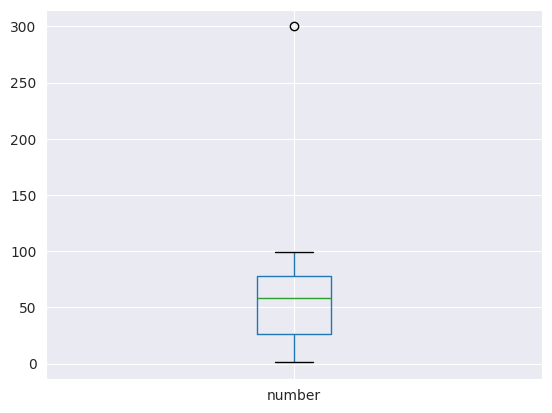

In [49]:
df.boxplot(['number'])

In [50]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


     PassengerId  Survived  Pclass                                       Name  \
7              8         0       3             Palsson, Master. Gosta Leonard   
11            12         1       1                   Bonnell, Miss. Elizabeth   
16            17         0       3                       Rice, Master. Eugene   
33            34         0       2                      Wheadon, Mr. Edward H   
43            44         1       2   Laroche, Miss. Simonne Marie Anne Andree   
..           ...       ...     ...                                        ...   
824          825         0       3               Panula, Master. Urho Abraham   
827          828         1       2                      Mallet, Master. Andre   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   
831          832         1       2            Richards, Master. George Sibley   
851          852         0       3                        Svensson, Mr. Johan   

        Sex    Age  SibSp  

<Axes: >

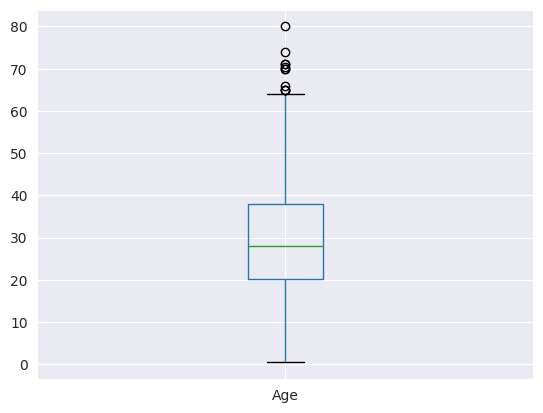

In [52]:
# Minimum percentile value
min_val = df['Age'].quantile(0.05)

# Maximum percentile value
max_val = df['Age'].quantile(0.95)

# Finding all the outliers
outliers = df[(df['Age'] < min_val) | (df['Age'] > max_val)]
print(outliers)

df.boxplot(['Age'])

     PassengerId  Survived  Pclass  \
27            28         0       1   
31            32         1       1   
88            89         1       1   
118          119         0       1   
127          128         1       3   
..           ...       ...     ...   
825          826         0       3   
843          844         0       3   
856          857         1       1   
872          873         0       1   
884          885         0       3   

                                               Name     Sex   Age  SibSp  \
27                   Fortune, Mr. Charles Alexander    male  19.0      3   
31   Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
88                       Fortune, Miss. Mabel Helen  female  23.0      3   
118                        Baxter, Mr. Quigg Edmond    male  24.0      0   
127                       Madsen, Mr. Fridtjof Arne    male  24.0      0   
..                                              ...     ...   ...    ...   
825        

<Axes: >

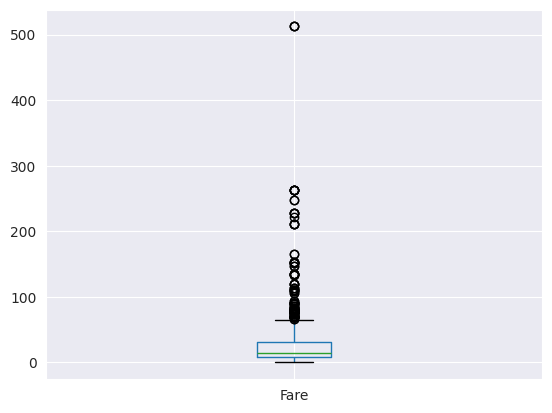

In [53]:
# Minimum percentile value
min_val = df['Fare'].quantile(0.05)

# Maximum percentile value
max_val = df['Fare'].quantile(0.95)

# Finding all the outliers
outliers = df[(df['Fare'] < min_val) | (df['Fare'] > max_val)]
print(outliers)

df.boxplot(['Fare'])

Before shape :  (891, 12)
After shape :  (635, 12)


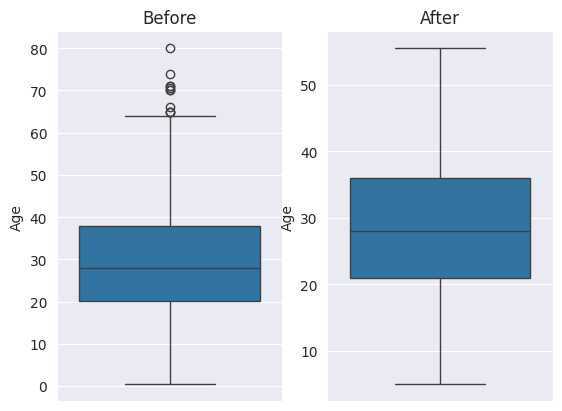

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)

df = pd.read_csv('train.csv')
df.head(10)

print("Before shape : ", df.shape)

# max and min quantile
min_val = df['Age'].quantile(0.05)
max_val = df['Age'].quantile(0.95)

# removing all the outliers
df2 = df[(df['Age'] > min_val) & (df['Age'] < max_val)]

print("After shape : ", df2.shape)

sns.boxplot(df['Age'], orient='v', ax=axes[0])
axes[0].set_title("Before")

sns.boxplot(df2['Age'], orient='v', ax=axes[1])
axes[1].set_title("After")

plt.show()

Before shape :  (891, 12)
After shape :  (791, 12)


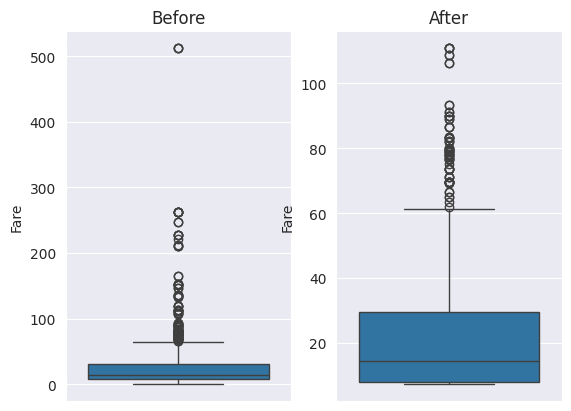

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)

df = pd.read_csv('train.csv')
df.head(10)

print("Before shape : ", df.shape)

# max and min quantile
min_val = df['Fare'].quantile(0.05)
max_val = df['Fare'].quantile(0.95)

# removing all the outliers
df2 = df[(df['Fare'] > min_val) & (df['Fare'] < max_val)]

print("After shape : ", df2.shape)

sns.boxplot(df['Fare'], orient='v', ax=axes[0])
axes[0].set_title("Before")

sns.boxplot(df2['Fare'], orient='v', ax=axes[1])
axes[1].set_title("After")

plt.show()

# IQR

Before shape :  (891, 12)
After shape :  (635, 12)
20.125 38.0
17.875
-6.6875 64.8125
Shape After Removing Outliers :  (891, 12)


Text(0.5, 1.0, 'After')

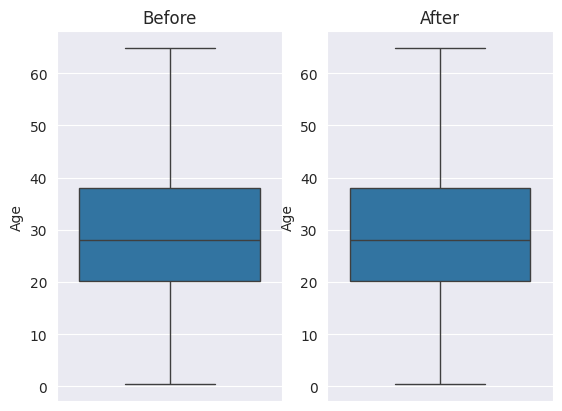

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)

df = pd.read_csv('train.csv')
df.head(10)

print("Before shape : ", df.shape)

# max and min quantile
min_val = df['Age'].quantile(0.05)
max_val = df['Age'].quantile(0.95)

# removing all the outliers
df2 = df[(df['Age'] > min_val) & (df['Age'] < max_val)]

print("After shape : ", df2.shape)

# sns.boxplot(df['Age'], orient='v', ax=axes[0])
# axes[0].set_title("Before")
# 
# sns.boxplot(df2['Age'], orient='v', ax=axes[1])
# axes[1].set_title("After")

########## Handling Outliers #############
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
print(Q1, Q3)

IQR = Q3 - Q1
print(IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit, upper_limit)

df2 = df
df2['Age'] = np.where(df2['Age'] > upper_limit, upper_limit, df2['Age'])
df2['Age'] = np.where(df2['Age'] < lower_limit, lower_limit, df2['Age'])

print("Shape After Removing Outliers : ", df2.shape)
sns.boxplot(df2['Age'], orient='v', ax=axes[0])
axes[0].set_title("Before")

sns.boxplot(df2['Age'], orient='v', ax=axes[1])
axes[1].set_title("After")


# =======================================================

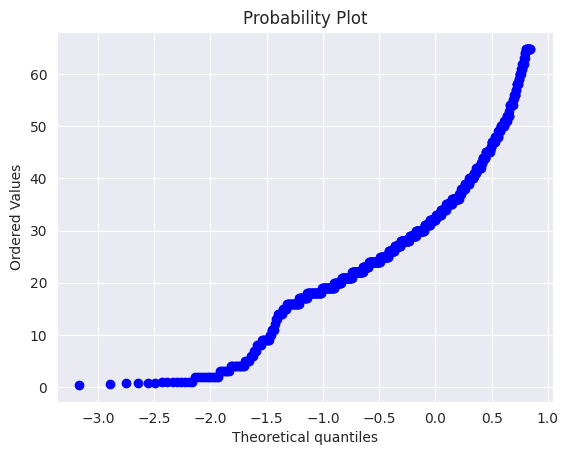

In [79]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

# read your data
data = df

# create and show the plot for Age
stats.probplot(data['Age'], dist='norm', plot=plt)

plt.show()


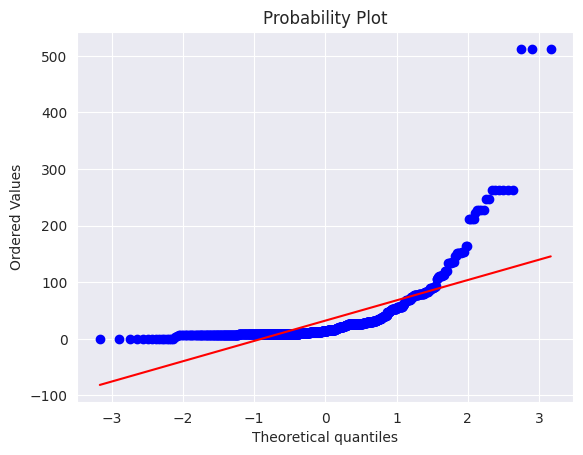

In [80]:
# create and show the plot for fare
stats.probplot(data['Fare'], dist='norm', plot=plt)

plt.show()

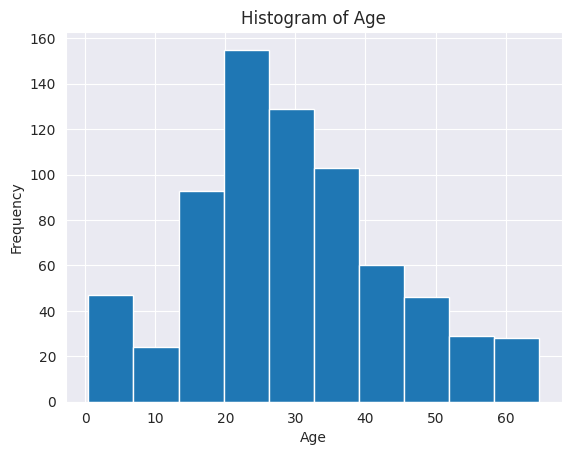

In [81]:
data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

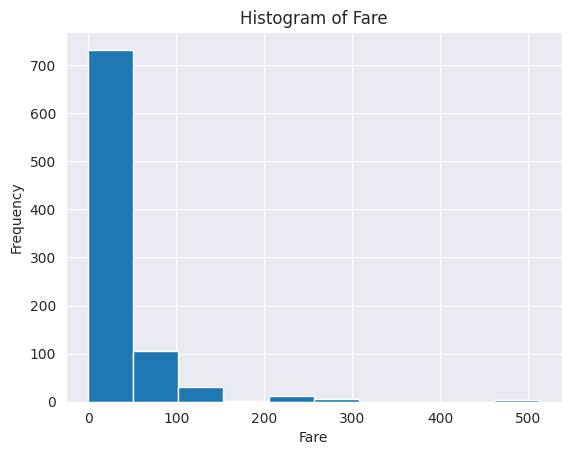

In [82]:
data['Fare'].hist()
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.show()

In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

# load your Data
data = df
data = data.replace(0,np.nan) # replace 0 with nan because 0 is not a valid value
data = data.dropna() # drop all nan

# create a column variables to hold the column that need transformation
columns = ['Age', 'Fare']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.log, validate=True)

# apply the transformation to your data
data_new = logarithm_transformer.transform(data[columns])
df_new = pd.DataFrame(data_new, columns=columns)
df_new.head(2)

,Age,Fare
0,1.386294,2.815409
1,3.135494,5.572154
